In [683]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations
from ast import literal_eval

# 1.Node = Actor, Edge = Director, 3 and 4group

In [684]:
df = pd.read_csv('1_N_Actor_E_Director.csv', low_memory=False)
df.head()

,Unnamed: 0,director_name,release_year,actor_list
0,0,\tCheung Chi-Sing,2002.0,"('Anthony Wong', 'Gillian Chung', 'Lam Suet', ..."
1,1,\tHuang Jian-Zhong,2004.0,"('Tao Zeru',)"
2,2,\tHuang Jian-Zhong,2005.0,"('Gu Yang', 'Natalie Meng Yao', 'Wang Qingxian..."
3,3,\tZhang Jing,2005.0,"('Cao Cui-Fen', 'Jiang Qinqin', 'Li Hai-Tao', ..."
4,4,\tZhang Jing,2006.0,"('Jiaxuan Li', 'Tang Wei', 'Tian Yu')"


In [685]:
# make author_list column from string type to tuple
df['actor_list'] = [literal_eval(x) for x in df['actor_list']]

actor_list = list(df['actor_list'])
direc_list = list(df['director_name'])
actor_list

edges_list = []
data_list = []
for i in range(len(actor_list)):
    comb = combinations(actor_list[i], 2)
    for j in list(comb): 
        edges_list.append(j)
        data_list.append(direc_list[i])
        
edges_list

G = nx.Graph()
G.add_edges_from(edges_list)



print(len(edges_list))
print(len(data_list))
for i in range(len(edges_list)):
    #print(edges_list[i][0],edges_list[i][1])
    #print(G[edges_list[i][0]][edges_list[i][1]])
    G[edges_list[i][0]][edges_list[i][1]]['director'] = data_list[i]
    #if G[edges_list[i][0]][edges_list[i][1]]['director']!=4:
    #    print(G[edges_list[i][0]],G[edges_list[i][1]])

G.remove_edges_from(G.selfloop_edges())

In [689]:
len(G.nodes())

146379

In [690]:
len(G.edges())

641185

In [80]:
# Compute the degree of every node: degrees
#degrees = []
沒有要做的話別執行
depth = 10

nodeLR = dict()
area_count = 0
for center in G.nodes():
    
    area_count+=1
    
    #if area_count >= 1000:
    #    continue
    print('node#',area_count)
    Circled = {center}
    LastNeighbor = {center}
    Neighbors = {}
    #ez = 0
    print(center)
    for dep in range(depth):
        
        newNeighbor = {p for inNode in LastNeighbor for p in G._adj[inNode] if p not in Circled}
        #newNeighbor = {p for inNode in LastNeighbor for p in G.neighbors(inNode) if p not in Circled}
        print('depth:', dep+1)
        print(len(newNeighbor),'(added new)')
        
        LastNeighbor = {i for i in newNeighbor}
        count = 0
        Circled.update(newNeighbor)
        '''
        for newN in newNeighbor:
            #ez+=sum([1 if inN in G[newN] else 0 for inN in Circled])
            #G.has_edge(newN)
            Circled.add(newN)
            
            count+=1
            if count==0:
                break
        '''
        print(len(Circled),'(in circle)')
        #print('ez: ', ez)
        print('-------------------------')
    uz = len(Circled)*(len(Circled)-1)/2
    
    #ez = sum([1 for p1 in Circled for p2 in Circled if p2 in G._adj[p1]])
    ez = G.subgraph(list(Circled)).number_of_edges()
    #ez = sum([G.number_of_edges(u,v) for u,v in combinations(list(Circled),2)])
    print(ez)
    print(uz)
    nodeLR[center] = (ez/uz) if uz!=0 else 0
    print('-------------------------')
    
print(nodeLR)
# Print the degrees
#print(degrees[:100])

node# 1
Anthony Wong
depth: 1
189 (added new)
190 (in circle)
-------------------------
depth: 2
2065 (added new)
2255 (in circle)
-------------------------
depth: 3
17389 (added new)
19644 (in circle)
-------------------------
depth: 4
46424 (added new)
66068 (in circle)
-------------------------
depth: 5
31199 (added new)
97267 (in circle)
-------------------------
depth: 6
9443 (added new)
106710 (in circle)
-------------------------
depth: 7
2114 (added new)
108824 (in circle)
-------------------------
depth: 8
492 (added new)
109316 (in circle)
-------------------------
depth: 9
92 (added new)
109408 (in circle)
-------------------------
depth: 10
29 (added new)
109437 (in circle)
-------------------------
586581
5988173766.0
-------------------------
node# 2
Gillian Chung
depth: 1
83 (added new)
84 (in circle)
-------------------------
depth: 2
1413 (added new)
1497 (in circle)
-------------------------
depth: 3
10287 (added new)
11784 (in circle)
-------------------------
depth:

586529
5985438166.0
-------------------------
node# 12
Li Hai-Tao
depth: 1
3 (added new)
4 (in circle)
-------------------------
depth: 2
71 (added new)
75 (in circle)
-------------------------
depth: 3
1730 (added new)
1805 (in circle)
-------------------------
depth: 4
17487 (added new)
19292 (in circle)
-------------------------
depth: 5
45479 (added new)
64771 (in circle)
-------------------------
depth: 6
31743 (added new)
96514 (in circle)
-------------------------
depth: 7
10008 (added new)
106522 (in circle)
-------------------------
depth: 8
2280 (added new)
108802 (in circle)
-------------------------
depth: 9
505 (added new)
109307 (in circle)
-------------------------
depth: 10
105 (added new)
109412 (in circle)
-------------------------
586529
5985438166.0
-------------------------
node# 13
Zhang Jingchu
depth: 1
74 (added new)
75 (in circle)
-------------------------
depth: 2
1730 (added new)
1805 (in circle)
-------------------------
depth: 3
17487 (added new)
19292 (in 

KeyboardInterrupt: 

In [532]:
# 將物件寫入csv檔
沒有要寫的話別執行
file_path = "connection_prob_to5.csv"

import csv
with open(file_path, 'w', newline='', encoding='utf-8') as outcsv:   
    #configure writer to write standard csv file
    writer = csv.writer(outcsv)
    for key in nodeLR_data:
        #nodeLR[key] 
        writer.writerow([key]+nodeLR_data[key])
    outcsv.flush()


In [718]:
# 讀取csv檔的內容進入 nodeLR 中
# 使用這個block讀取community的計算結果(depth1~4)
nodeLR = dict()
#haven't set
#for key in nodeLR:
#    nodeLR_data[key][0] = nodeLR[key]
    
import networkx as nx
from itertools import combinations
cp_record=[[] for i in range(5)]
cp_record_all = []
# 開啟 CSV 檔案
with open("connection_prob_to5.csv", newline='', encoding='utf-8') as csvfile:

  # 讀取 CSV 檔案內容
    rows = csv.reader(csvfile)

  # 以迴圈輸出每一列
    #for row in rows:
    #    print(row)
    for row in rows:
        #nodeLR_data[row[0]] = [0.87, row[1], 0.8787]
        #nodeLR_data[row[0]] = [float(i) for i in nodeLR_data[row[0]]+[row[1]]]
                               
        nodeLR_data[row[0]] = [float(i) for i in row[1:]]
        
        
        cp_record[0].append(float(row[1]))
        cp_record[1].append(float(row[2]))
        cp_record[2].append(float(row[3]))
        cp_record[3].append(float(row[4]))
        cp_record[4].append(float(row[5]))
        cp_record_all += [float(i) for i in row[1:]]

In [576]:
for k in nodeLR_data:
    if k=='Bernhard Schir':
        print(nodeLR_data[k])

[0.1323746675859352, 0.009695432479548068, 0.0010967420270170838, 0.00021918777638342126, 0.00012109858613381824]


In [719]:
sum([i==1 for i in cp_record[0]]+[i==1 for i in cp_record[1]]+[i==1 for i in cp_record[2]]\
    +[i==1 for i in cp_record[3]]+[i==1 for i in cp_record[4]])

227534

In [720]:
#清除過高的cluster的設定值
cut = [0.9 for i in range(5)]
flu_num = flush_to_dep = 5
"""
cp_record = [cp_record[0]]+[[cp_record[d][i]  \
              for i in range(len(cp_record[d])) \
              if cp_record[d-1][i]!=cp_record[d][i]] for d in range(1,4)]
"""
new_cp = [[] for i in range(5)]
for i in range(len(cp_record[0])):
    flush = False
    for d in range(1,flu_num):
        if (cp_record[d-1][i]==cp_record[d][i]) and (cp_record[d][i]!=0):
            flush = True
    if flush==False:
        for j in range(5):
            new_cp[j].append(cp_record[j][i])
            
cp_record = new_cp

for d in range(5):
    cp_record[d] = [i for i in cp_record[d] if i<cut[d]]
cp_record_all = [i for i in cp_record_all if i<1]
#print(new_cp)
[len(i) for i in cp_record]

[41902, 109521, 109523, 109523, 109523]

In [721]:
def find_interval(arr):
    std = np.var(np.array(arr)-641185/(146379*146378/2))**0.5
    avg = np.average(arr)-641185/(146379*146378/2)
    return (avg+1.64*std, avg+3*std)


accept = [find_interval(cp_record[d]) for d in range(5)]
accept_general = find_interval(cp_record_all)
accept

[(0.7420648707300121, 0.9989208497061863),
 (0.4518589011991698, 0.6845854422066152),
 (0.1578485297195908, 0.2567648846453163),
 (0.05692211042478177, 0.0967560475460189),
 (0.022449559609965333, 0.03933056870585241)]

In [606]:
#設定接受的最小 LR 的值，混和母體時使用
thres = accept_general[1]
#Thres = [thres for i in range(len(accept))]

#設定接受的最小 LR 的值，分開各深度母體時使用
Thres = np.array(accept)[:,0]
#Thres = np.array(accept)[:,1]

print(len(nodeLR_data))
a=[0,0,0,0,0,0]
commu_use = dict()
for k in nodeLR_data:
    
    cut_LR = [c for c in nodeLR_data[k]] 
    cont_ = False
    for d in range(1,flu_num):
        if (cut_LR[d-1]==cut_LR[d]) and (cut_LR[d-1]!=0):
            cont_ = True
    if cont_:continue
        
    #cut_LR = [cut_LR[0]]+[0 if cut_LR[i-1]==cut_LR[i] else cut_LR[i] for i in range(1,len(cut_LR))]
    cut_LR = [cut_LR[i] if cut_LR[i]<cut[i] else 0 for i in range(len(cut_LR))] 
    max_acc_d = max([0]+[d for d in range(1,len(cut_LR)+1) if Thres[d-1]<=cut_LR[d-1]])
    if max_acc_d==5:
        pass
        #print(cut_LR)
        
    if max_acc_d > 0:
        commu_use[k] = max_acc_d
        a[max_acc_d]+=1
        
print(len(commu_use))
print(a[1:]) # histogram of depths
#print(commu_use)

146379
18308
[1075, 8143, 4412, 2556, 2122]


In [703]:
print(nodeLR_data['Anthony Wong'])

[0.11829573934837093, 0.0063791987439919574, 0.0010475835031819713, 0.00021087423091358217, 0.00011784894482261312]


In [607]:

# comput the values of e_d, the average k-th nearest neighbors 

depth = 4
#avg_knn = [0, 8.76061456902971, 194.22751897471633, 2460.899363979806]
avg_knn = [8.76061456902971, 194.22751897471633, 2460.899363979806, 11774.773075372834]
re_calc = False

if re_calc==True:
    knn = [0 for i in range(depth)]
    area_count = 0
    for center in G.nodes():

        area_count+=1

        #if area_count < 50000:
        #    continue
        if area_count%1000==0:
            print('node#',area_count,center)
        Circled = {center}
        LastNeighbor = {center}
        Neighbors = {}
        #ez = 0
        #print()
        for dep in range(depth):

            newNeighbor = {p for inNode in LastNeighbor for p in G._adj[inNode] if p not in Circled}
            #newNeighbor = {p for inNode in LastNeighbor for p in G.neighbors(inNode) if p not in Circled}
            #print('depth:', dep+1)
            #print(len(newNeighbor),'(added new)')
            knn[dep] += len(newNeighbor)
            LastNeighbor = {i for i in newNeighbor}
            count = 0
            Circled.update(newNeighbor)





    avg_knn = [i/G.number_of_nodes() for i in knn]
print('avg_knn= ', avg_knn)

avg_knn=  [8.76061456902971, 194.22751897471633, 2460.899363979806, 11774.773075372834]


In [608]:
# 產生距離為d的平均節點數函數
# 做為一個list存起來，同理也先存g(d)的list
# 存20個

def exp_neighbors(G, max_d):
    record = [1.0]
    now_node = G.number_of_nodes()-1
    c_p = G.number_of_edges()/(G.number_of_nodes()*(G.number_of_nodes()-1)/2)
    for d in range(1,max_d+1):
        exNodes = 0
        for add_i in range(int(record[d-1]+.999)):
            now_node -= (now_node*c_p)
            exNodes += (now_node*c_p)
        record.append(exNodes)
    return record

#e_d = exp_neighbors(G, 10)
#growing rate of e_d
#print([e_d[i]/e_d[i-1] for i in range(2,11)])
e_d = [0]+avg_knn
g_d = [np.exp(-d**2) for d in range(10+1)]
print(e_d)
print(g_d)
# d等於多少就放多少當index到陣列裡，不用減一

[0, 8.76061456902971, 194.22751897471633, 2460.899363979806, 11774.773075372834]
[1.0, 0.36787944117144233, 0.01831563888873418, 0.00012340980408667956, 1.1253517471925912e-07, 1.3887943864964021e-11, 2.3195228302435696e-16, 5.242885663363464e-22, 1.603810890548638e-28, 6.639677199580735e-36, 3.720075976020836e-44]


In [609]:
def FDC(o_d, e_d=e_d, g_d=g_d):
    return sum([g_d[d]*(o_d[d] - e_d[d]) for d in range(1,min(99,len(o_d)))])
def FDC1(o_d, e_d=e_d, g_d=g_d):
    return [g_d[d]*(o_d[d] - e_d[d]) for d in range(1,min(99,len(o_d)))]

In [610]:
#focus degree centrality


# for test
#Picked_centers = ['Ruby Wong','Jiang Qinqin','Shona McGarty','Nicolás Galvagno']

Picked_commu = commu_use
max_calc_depth = 3
commu_info = []
size_ = []

commu_count=0
for center in Picked_commu:
    
    depth = Picked_commu[center]
    if depth==0:continue
    commu_count+=1    
    #if commu_count > 10000:
    #    continue
    if commu_count%500==0:
        print(commu_count)
    #if depth < 3:
    #    continue
    Circled = {center}
    LastNeighbor = {center}
    Neighbors = {}
    for dep in range(depth):
        newNeighbor = {p for inNode in LastNeighbor for p in G._adj[inNode] if p not in Circled}
        #newNeighbor = {p for inNode in LastNeighbor for p in G.neighbors(inNode) if p not in Circled}
        #print('depth:', dep+1)
        #print(len(newNeighbor),'(added new)')
        
        LastNeighbor = {i for i in newNeighbor}
        count = 0
        Circled.update(newNeighbor)
    
    H = G.subgraph(Circled)
    #print('node#',commu_count,': ',center,',',' size:',len(Circled))
    try_ = 0
    best_node = 'none'
    best_score = 0
    
    #r=[]
    
    
    for focus in H.nodes():
    
        try_+=1
        #print('\ttry focus#',try_)
        focus_Circled = {focus}
        focus_LastNeighbor = {focus}
        focus_Neighbors = {}
        #print('\t',focus)
        F_c = 0
        o_d = [1]
        for k in range(max_calc_depth):

            focus_newNeighbor = {p for inNode in focus_LastNeighbor for p in H._adj[inNode] if p not in focus_Circled}
            
            #print('\tdepth:', len(o_d))
            #print('\t',len(focus_newNeighbor),'(added new)')
            #len(focus_newNeighbor)
            focus_LastNeighbor = {i for i in focus_newNeighbor}
            count = 0
            
            focus_Circled.update(focus_newNeighbor)
            #print('\t',len(focus_Circled),'(in circle)')
            #print('ez: ', ez)
            #print('\t-------------------------')
            if len(focus_newNeighbor)==0:
                break
            o_d.append(len(focus_newNeighbor))
            
        fdc = FDC(o_d)
        if (best_node=='none') or (fdc>best_score):
            best_node, best_score = focus, fdc
        #print(try_, FDC1(o_d))
        
        
        #r.append([FDC1(o_d), FDC(o_d)])
        
    #print(best_node, best_score)
    commu_info.append([center, best_node, best_score, len(Circled), depth])
    size_.append(len(Circled))
    


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000


In [617]:
#np.sort(r[:][1])
#r1 = [i[1] for i in r]
np.sort(size_)

array([   3,    3,    3, ..., 1594, 1594, 1594])

In [ ]:
Commu_pd = pd.DataFrame(commu_info, columns = ['center', 'focus', 'best_FDC', 'size', 'depth']) 

In [630]:
Commu_pd.to_csv('Result.csv')

In [631]:

Commu_pd = pd.read_csv('Result.csv')
Commu_pd.head()

,Unnamed: 0,center,focus,best_FDC,size,depth
0,0,Chandra Lakshman,Prithviraj Sukumaran,-0.279814,9,1
1,1,Piee,Piee,2.295342,16,1
2,2,Boris Karloff,Boris Karloff,-1.383453,6,1
3,3,Aaron Fronk,Cooper Johnson,1.559583,14,2
4,4,Vince DeGaetano,Cooper Johnson,1.559583,14,2


In [632]:
Commu_pd = pd.DataFrame(commu_info, columns = ['center', 'focus', 'best_FDC', 'size', 'depth']) 
Commu_pd.head()#, columns = ['name']+['dep'+str(i) for i in range(1,4+1)]
Commu_pd['best_FDC'] = Commu_pd['best_FDC'].apply(float)
Commu_pd['size'] = Commu_pd['size'].apply(int)



Commu_pd[Commu_pd['focus']=='Hannes Jaenicke']#[Commu_pd['depth']<5]

,center,focus,best_FDC,size,depth
14,DJ Jamaika,Matheus Nachtergaele,25.434481,516,5
326,Fred Nicole,Liam Neeson,53.126152,621,5
327,Kilian Fischhuber,Liam Neeson,53.126152,621,5
328,Alex Puccio,Liam Neeson,53.126152,627,5
680,Heidi Foland,Luke Perry,61.879138,634,5
1159,Christoph Baumann,Michael Mendl,74.638816,710,4
1161,Ângelo Rodrigues,Tadanobu Asano,68.669037,807,5
1262,Manfred Sarközi,Alexandra Maria Lara,43.355286,584,5
1263,Mario L'Ross,Alexandra Maria Lara,43.355286,584,5
1376,Maryssa Wanlass,Gil Bellows,50.846761,600,5


In [613]:
Commu_pd.size/5

18308.0

In [614]:
Commu_pd[Commu_pd['size']>900].focus

14            Matheus Nachtergaele
326                    Liam Neeson
327                    Liam Neeson
328                    Liam Neeson
498                  Filip Peeters
499                  Filip Peeters
536                 Brinke Stevens
537                 Brinke Stevens
680                     Luke Perry
751              Mikael Persbrandt
759                  Dennis Hopper
903                  Kang Dong-won
904                  Kang Dong-won
915                      John Hurt
918                      John Hurt
921                 Kazue Fukiishi
1014               Dolores Heredia
1072                 Wang Baoqiang
1159                 Michael Mendl
1161                Tadanobu Asano
1183                 Maeve Quinlan
1184                 Maeve Quinlan
1224                   Stacy Keach
1262          Alexandra Maria Lara
1263          Alexandra Maria Lara
1277                 Wang Baoqiang
1327                    Colm Feore
1328                    Colm Feore
1329                

In [693]:
GB = Commu_pd[Commu_pd['size']>900].groupby('focus')

In [694]:
#for i, j in GB.focus:
#    print(j)
for i, j in GB.focus:
    print(i,len(j))

Anupam Kher 3
Eric Tsang 3
Fritz Karl 13
Hannes Jaenicke 3
Henry Hübchen 1
Iza Calzado 1
John Cusack 1
Lacey Chabert 4
Ulrich Noethen 3


In [700]:
m = 'Hannes Jaenicke'



for n in G.neighbors(m):
    print(n,'\t\t',G[m][n]['director'])

Julia Stinshoff 		 Andi Niessner
Thure Riefenstein 		 Andi Niessner
Uwe Ochsenknecht 		 Andi Niessner
Florentine Lahme 		 Oliver Schmitz
Hannes Hellmann 		 Andi Niessner
Nina Kronjäger 		 Andi Niessner
Oliver Stokowski 		 Andi Niessner
Altay Ünsal 		 Ansgar Ahlers
Leonie Kuizenga 		 Ansgar Ahlers
Minh-Khai Phan-Thi 		 Ansgar Ahlers
Aglaia Szyszkowitz 		 Raffaele Mertes
Armin Rohde 		 Stephan Wagner
Christine Urspruch 		 Ben Verbong
Eva Mattes 		 Ben Verbong
Ulrich Noethen 		 Ben Verbong
August Zirner 		 Gernot Roll
Bernadette Heerwagen 		 Thomas Jauch
Renée Soutendijk 		 Ben Verbong
Dennenesch Zoudé 		 Carlo Rola
Rebecca Immanuel 		 Thomas Nennstiel
Walter Kreye 		 Carlo Rola
Fritzi Haberlandt 		 Daniel Krauss
Mariele Millowitsch 		 Thomas Nennstiel
Max Herbrechter 		 Dirk Regel
Max Riemelt 		 Peter Gersina
Miroslav Nemec 		 Dirk Regel
Daniela Ziegler 		 Dirk Regel
Simone Thomalla 		 Oliver Schmitz
Tina Bordihn 		 Dirk Regel
Ann-Kathrin Kramer 		 Dirk Regel
Lisa Kreuzer 		 Dirk Regel
S

In [701]:
Commu_pd[Commu_pd['focus']=='Anthony Wong']#[Commu_pd['depth']<5]

,center,focus,best_FDC,size,depth
9212,Blue Cheng-Lung Lan,Anthony Wong,69.555558,614,5
9214,Po Tai,Anthony Wong,69.555558,614,5
15763,Adonis He,Anthony Wong,64.570989,315,4
15764,Fiona Wang,Anthony Wong,64.570989,315,4
15765,Moe Chin,Anthony Wong,64.570989,315,4
17720,Deng Gang,Anthony Wong,49.655398,789,5
17721,Guo Xiao,Anthony Wong,49.655398,789,5
17723,Lu Qiwei,Anthony Wong,49.655398,789,5
17724,Su Xiaotong,Anthony Wong,49.655398,789,5


In [722]:
new_LR = pd.DataFrame.from_dict({('d='+str(i)):cp_record[i] for i in range(5)})

ValueError: arrays must all be same length

In [761]:
print(new_LR.head())

                   LR Distance  index
0                0.75      d=1      0
1               0.775      d=1      1
2  0.8666666666666667      d=1      2
3  0.7692307692307693      d=1      3
4  0.8095238095238095      d=1      4


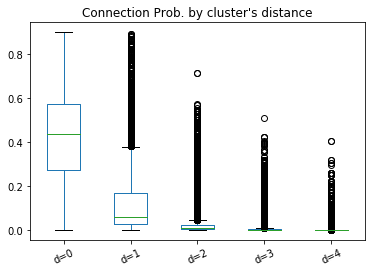

In [716]:
new_LR.plot(kind = 'box', title = 'Connection Prob. by cluster\'s distance')
plt.xticks(rotation=25)
plt.show()

In [754]:
[len(cp_record[i]) for i in range(4)]

[41902, 109521, 109523, 109523]

In [766]:
cp = np.concatenate([[[float(cp_record[i][j]),'d='+str(i+1)] for j in range(len(cp_record[i]))] for i in range(5)])
cp = [[j[0],j[1],i] for i,j in enumerate(cp)]

new_LR = pd.DataFrame(cp, columns = ['LR', 'Distance', 'index']) 
cp[:10]

[['0.75', 'd=1', 0],
 ['0.775', 'd=1', 1],
 ['0.8666666666666667', 'd=1', 2],
 ['0.7692307692307693', 'd=1', 3],
 ['0.8095238095238095', 'd=1', 4],
 ['0.7878787878787878', 'd=1', 5],
 ['0.8', 'd=1', 6],
 ['0.8095238095238095', 'd=1', 7],
 ['0.7857142857142857', 'd=1', 8],
 ['0.823076923076923', 'd=1', 9]]

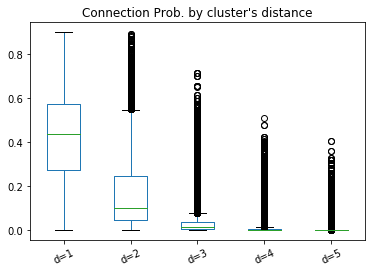

In [767]:
new_LR['LR'] = new_LR['LR'].apply(float)
new_LR.pivot_table(values = 'LR', columns = 'Distance', index = 'index').plot(kind = 'box', title = 'Connection Prob. by cluster\'s distance')
plt.xticks(rotation=25)
plt.show()

In [ ]:
 'continent', index = 'country')